<a href="https://colab.research.google.com/github/ArtemAvanesov/Python-Labs/blob/master/%D0%AD%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5%20%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D1%8B/Autoencoders/autoencoders_leafs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

Using TensorFlow backend.


# Encoder

In [3]:
input_img = Input(shape=(148, 148, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2))(x)
print(encoded.shape)

(None, 37, 37, 2)


# Decoder

In [4]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (2, 2), activation='sigmoid', padding='same')(x)

print(decoded.shape)

(None, 148, 148, 3)


# Set model params 

In [43]:
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 148, 148, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 2)         578       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 2)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 16)        304       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 74, 74, 16)        0   

# Load and split data

In [6]:
train_dir = '/content/drive/My Drive/Colab/Roonyx/work_5/splitted_dataset/train'
validation_dir = '/content/drive/My Drive/Colab/Roonyx/work_5/splitted_dataset/validation'
test_dir = '/content/drive/My Drive/Colab/Roonyx/work_5/splitted_dataset/test'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(148, 148),
        batch_size=300,
        class_mode='input')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(148, 148),
        batch_size=300,
        class_mode='input')

test_generator=test_datagen.flow_from_directory(
        test_dir,
        target_size=(148,148),
        batch_size=10,
        class_mode='input')

Found 1598 images belonging to 4 classes.
Found 339 images belonging to 4 classes.
Found 339 images belonging to 4 classes.


# Plot result function

In [0]:
def plot_result(model):
  x_test,_ = test_generator.next()
  decoded_imgs = model.predict(x_test)

  n = 10
  plt.figure(figsize=(20, 4))
  for i in range(1, n, 1):
      # display original
      ax = plt.subplot(2, n, i)
      plt.imshow(x_test[i].reshape(148, 148,3))
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, n, i + n)
      plt.imshow(decoded_imgs[i].reshape(148, 148,3))
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

# Train model

In [45]:
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(train_generator,
                          epochs=100,
                          shuffle=True,
                          validation_data=validation_generator)

Epoch 1/100
6/6 [==============================] - 144s 24s/step - loss: 0.0462 - val_loss: 0.0425
Epoch 2/100
6/6 [==============================] - 135s 23s/step - loss: 0.0416 - val_loss: 0.0397
Epoch 3/100
6/6 [==============================] - 136s 23s/step - loss: 0.0385 - val_loss: 0.0332
Epoch 4/100
6/6 [==============================] - 136s 23s/step - loss: 0.0326 - val_loss: 0.0308
Epoch 5/100
6/6 [==============================] - 135s 23s/step - loss: 0.0250 - val_loss: 0.0186
Epoch 6/100
6/6 [==============================] - 135s 23s/step - loss: 0.0182 - val_loss: 0.0160
Epoch 7/100
6/6 [==============================] - 136s 23s/step - loss: 0.0155 - val_loss: 0.0159
Epoch 8/100
6/6 [==============================] - 135s 23s/step - loss: 0.0132 - val_loss: 0.0125
Epoch 9/100
6/6 [==============================] - 135s 23s/step - loss: 0.0118 - val_loss: 0.0104
Epoch 10/100
6/6 [==============================] - 135s 23s/step - loss: 0.0108 - val_loss: 0.0093
Epoch 11/

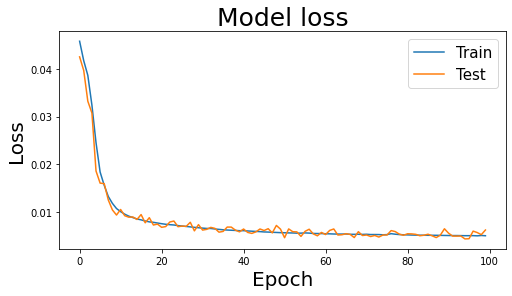

In [58]:
plt.figure(figsize=(8,4))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize = 25)
plt.ylabel('Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.legend(['Train', 'Test'], loc='upper right', fontsize=15)

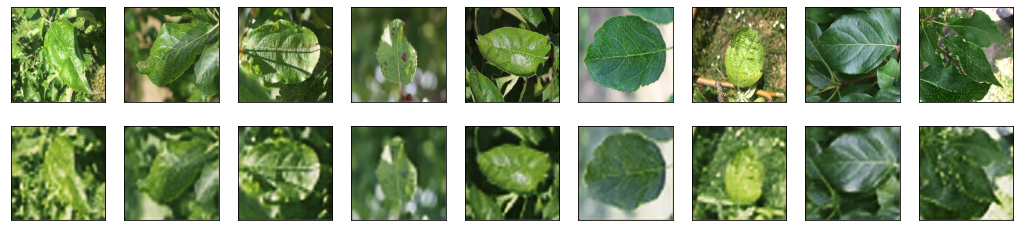

In [52]:
plot_result(autoencoder)

In [0]:
autoencoder.save('/content/drive/My Drive/Colab/Autoencoders/leafs_model.h5')